In [33]:
volume_macro = (12*12*4.8)*6 # m^3
accetanza_macro = 3100 # m^2 sr
volume_cupid = (3*3*3) # m^3
print (volume_macro,"m^3")
print (accetanza_macro,"m^2 sr")
print (volume_cupid,"m^3")

4147.2 m^3
3100 m^2 sr
27 m^3


In [ ]:
! sh 


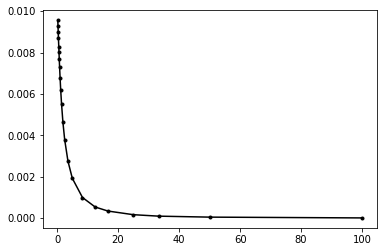

1 0.247 0.00956 13.513513513513512
2 0.321 0.009264 13.888888888888888
3 0.393 0.00897 14.285714285714285
4 0.463 0.008689 9.900990099009908
5 0.564 0.008293 14.492753623188394
6 0.633 0.008037 11.23595505617978
7 0.722 0.007713 8.403361344537815
8 0.841 0.007286 5.988023952095807
9 1.008 0.006756 5.263157894736843
10 1.198 0.006199 3.571428571428571
11 1.478 0.00552 2.2075055187637966
12 1.931 0.00463 1.733102253032929
13 2.508 0.003793 0.9337068160597571
14 3.579 0.00276 0.6997900629811058
15 5.008 0.001934 0.3000300030003001
16 8.341 0.001008 0.2398656752218757
17 12.51 0.0005487 0.23980815347721823
18 16.68 0.0003551 0.12004801920768304
19 25.01 0.0001792 0.12004801920768304
20 33.34 0.0001084 0.05998800239952012
21 50.01 6.139e-05 0.019999999999999997


In [104]:
#
# pag 236 Grainder muon integral intensity at 600 m above see level cm-2 s-1 sr-1
#
x = np.array([0.247, 0.321, 0.393, 0.463, 0.564, 0.633, 0.722, 0.841, 
          1.008, 1.198, 1.478, 1.931, 2.508, 3.579, 5.008, 8.341, 
          12.51, 16.68, 25.01, 33.34, 50.01, 100.01])
F = np.array([9.56e-3, 9.264e-3, 8.970e-3, 8.689e-3, 8.293e-3, 8.037e-3, 7.713e-3, 
        7.286e-3, 6.756e-3, 6.199e-3, 5.520e-3, 4.630e-3, 3.793e-3, 2.760e-3, 1.934e-3,
        1.008e-3, 5.487e-4, 3.551e-4, 1.792e-4, 1.084e-4, 6.139e-5, 2.339e-5])
# Emean =[]
# Fdif = []
# for i, f in enumerate(flux):
#     if i > 0:
#         Emean.append((energy[i]+energy0)/2)
#         Fdif.append(Fdif0-f)
#     energy0 = energy[i]
#     Fdif0 = f

plt.plot(x,F,'k.-')
#plt.xscale('log')
#plt.yscale('log')
plt.show()
point = 100
xp=[]

for i in range(1,len(x)):
    etot = np.random.random(point)
    for j, e in enumerate(etot):
        ci = (1/(x[i]-x[i-1]))
        xy = x[i-1]+(e-F[i-1])/ci
        xp.append(xy)
    print(i, x[i-1], F[i-1], ci)


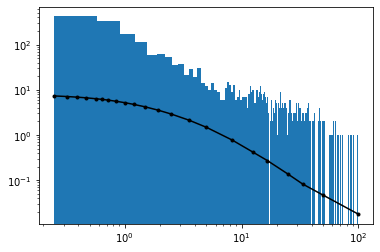

In [154]:
bins = 300
plt.hist(np.array(xp), bins)
plt.plot(x,(F/bins)*(len(x)*point)/F[0],'k.-')
plt.xscale('log')
plt.yscale('log')
plt.show()

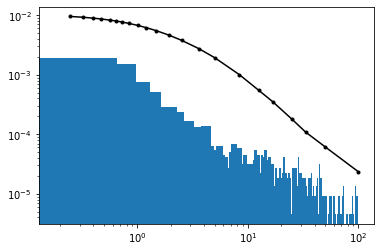

In [167]:
his, bbb = np.histogram(xp, bins)
plt.bar(bbb[:-1],his/((x[-1]-x[0])*(len(x)*point)))
plt.plot(x,F,'k.-')
plt.xscale('log')
plt.yscale('log')

plt.show()

# flux 
![img](./mu_lngs.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
gm = 2.78
A0 = 0.26
# energy in GeV
# E0 = 1
# E1 = 1e4
# E = np.linspace(E0, E1, 20)
E0 = 0.1
E1 = 4
E = np.logspace(E0, E1, 20)
def rate_theta(E, theta):
    return 1.0/(1+1.1*E*np.cos(theta)/115) + 0.054/(1+1.1*E*np.cos(theta)/850)

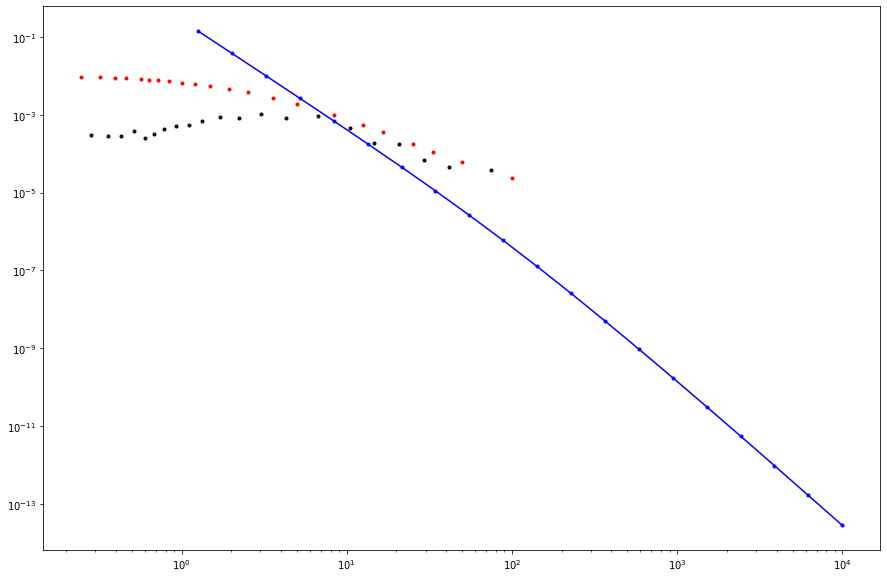

In [51]:
Nm = []
for i, e in enumerate(E):
    Nm.append(A0*rate_theta(e, 0)*e**(-gm))
    # if i > 0:
    #     Nm.append(A0*( rate_theta(e0, 0)*e0**(-gm+1) - rate_theta(e, 0)*e**(-gm+1)))
    #     #print(Nm, "cm^-2 s-1 sr -1")
    # e0 = e
    
plt.figure(figsize=(15, 10))
plt.plot(E, np.array(Nm), 'b.-')
plt.plot(Emean, Fdif, 'k.')
plt.plot(energy, flux, 'r.')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [11]:
E = 0.247; theta = 0 
A0*rate_theta(E, theta)*E**(-gm) 

13.339421966706482

In [15]:
maxgen = 1000
flux_pdf = flux/flux[0]
x = np.random.random(maxgen)*(energy[-1]-energy[0])
y = np.random.random(maxgen)

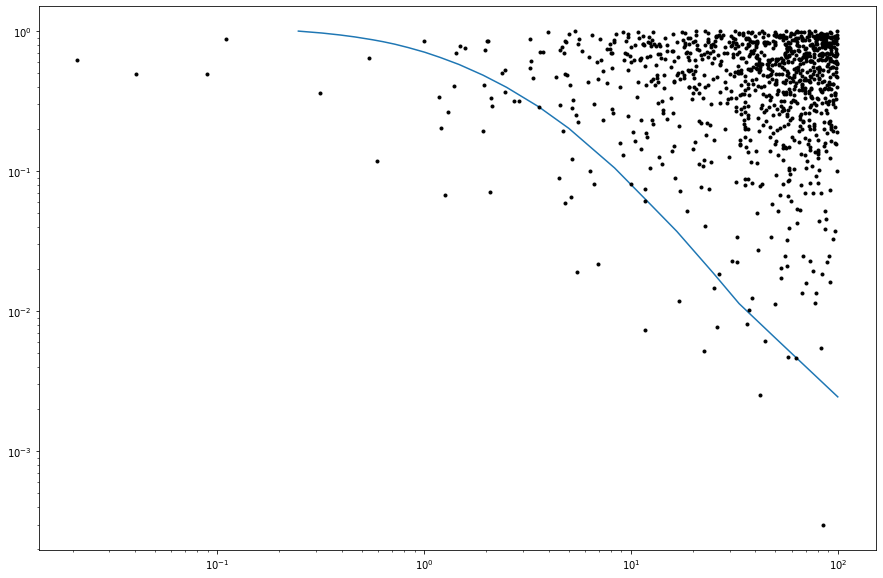

In [16]:
plt.figure(figsize=(15,10))
plt.plot(energy, flux_pdf)
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,'k.')
plt.show()

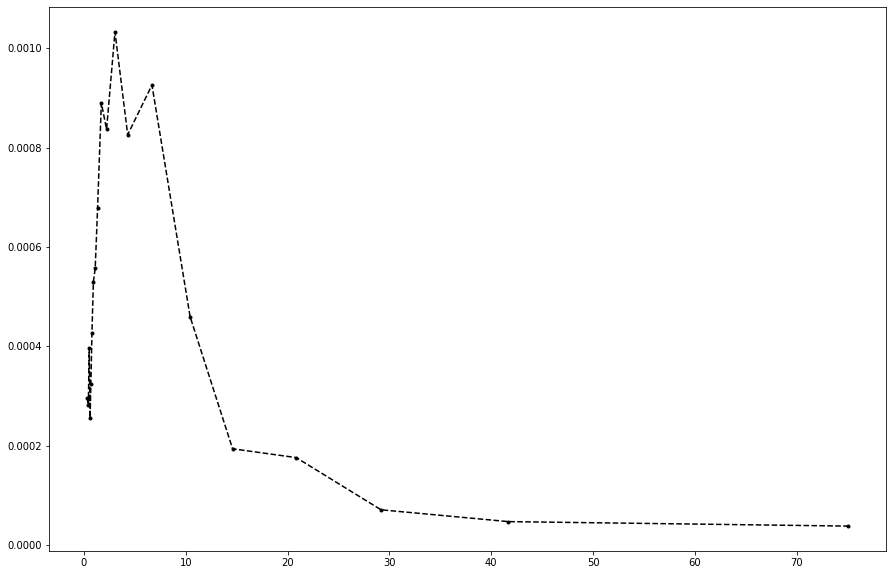

In [80]:
plt.figure(figsize=(15,10))
#plt.plot(energy, flux, 'r.-')
plt.plot(Emean, Fdif, 'k.--')
plt.show()

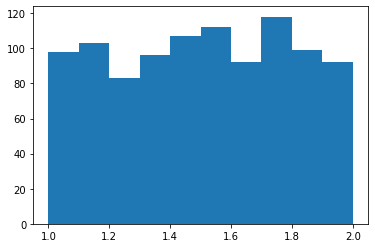

In [12]:
#
# distribuzione normale con inversione della funzione di probabilita
# 1/(a-b) tra a e b, 0 altrove
#
y = np.random.random(1000)
a = 1; b = 2
x = a+(b-a)*y
plt.hist(x,10)
plt.show()

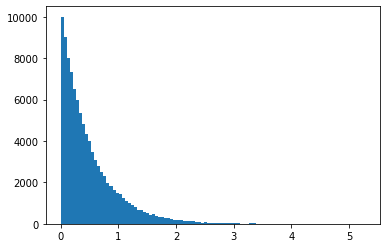

In [13]:
#
# distribuzione esponezilae con inversione della funzione di probabilita
# ae^-ax per x,a >0 , 0 x<0
#
y = np.random.random(100000)
a = 2
x = (-1/a)*np.log(y)
plt.hist(x, 100)
plt.show()

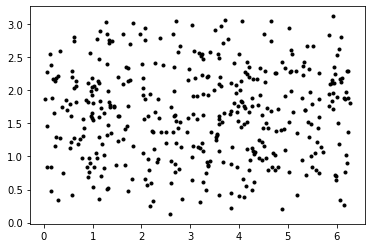

In [66]:
#
# distribuzione esponezilae con inversione della funzione di probabilita
# ae^-ax per x,a >0 , 0 x<0
#
g = np.random.random(400)
e = np.random.random(400)
phi = 2*np.pi*g
theta = np.arccos(1-2*e)
plt.plot(phi, theta, 'k.')
plt.show()

0


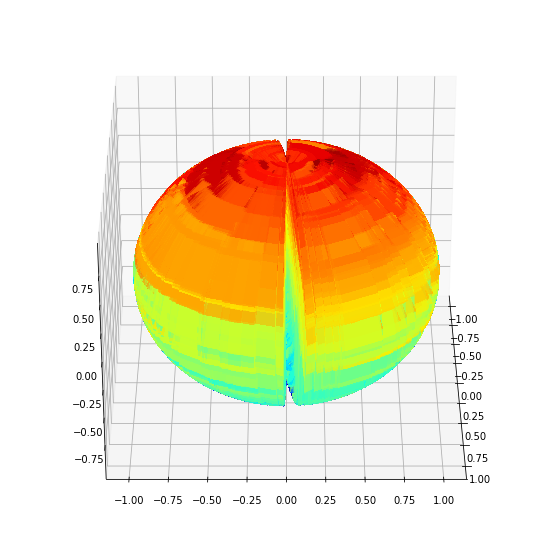

90


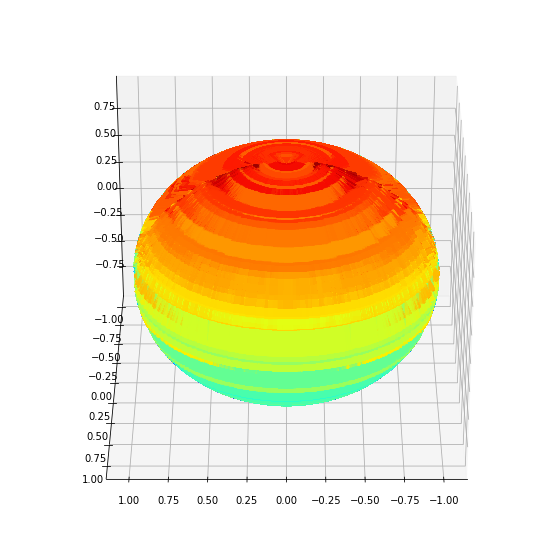

180


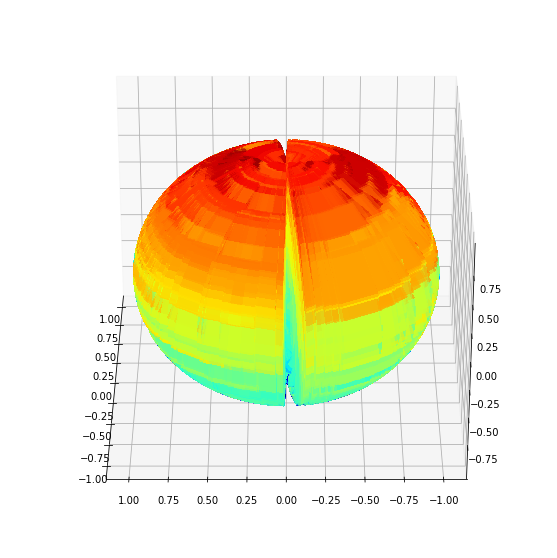

270


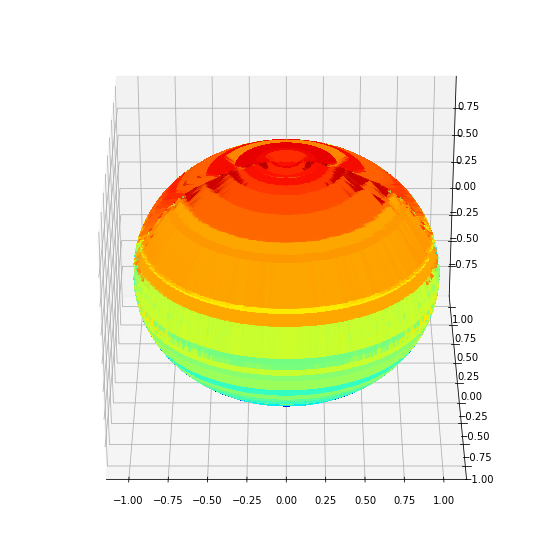

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

#theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)
# R = np.cos(PHI**2)
R = 1
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)


for angle in range(0, 360, 90):
    print (angle)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1, projection='3d')

    ax.view_init(30, angle)

    plot = ax.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
        linewidth=0, antialiased=False, alpha=0.5)

    plt.show()
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)